<a href="https://colab.research.google.com/github/LukynZa/Global_Terrorism_1970-2017/blob/main/Global_terrorism_pracovni_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to do
#
# nadefinovat variables - asi všechny do jednoho bloku a zakomentovat za to
#
#
#
#

In [ ]:
# pip install
!pip3 install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 48.9 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 30.5 MB 1.4 MB/s 


In [ ]:
# imports
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation,rc
%matplotlib inline
import matplotlib.patches as mpatches
import numpy as np
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import warnings
warnings.filterwarnings('ignore')
from scipy import signal
import plotly.express as px
from mpl_toolkits.basemap import Basemap
import io
import base64
from IPython.display import HTML, display


Mounted at /content/drive


In [ ]:

# data loading
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/globalterrorismdb.csv', encoding='latin')
df = dataset.copy()

# 1) pohled na dataset

In [ ]:
# check 1st 5 rows
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# check last 5 rows in DF
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
# dataset
df.shape

(181691, 135)

In [ ]:
# column names and their data types
with pd.option_context('display.max_rows', None):
    print(df.dtypes)

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [ ]:
# empty values check
for col in df:
    print((col) + '.........' + str(sum(pd.isnull(df[col]))))

eventid.........0
iyear.........0
imonth.........0
iday.........0
approxdate.........172452
extended.........0
resolution.........179471
country.........0
country_txt.........0
region.........0
region_txt.........0
provstate.........421
city.........434
latitude.........4556
longitude.........4557
specificity.........6
vicinity.........0
location.........126196
summary.........66129
crit1.........0
crit2.........0
crit3.........0
doubtterr.........1
alternative.........152680
alternative_txt.........152680
multiple.........1
success.........0
suicide.........0
attacktype1.........0
attacktype1_txt.........0
attacktype2.........175377
attacktype2_txt.........175377
attacktype3.........181263
attacktype3_txt.........181263
targtype1.........0
targtype1_txt.........0
targsubtype1.........10373
targsubtype1_txt.........10373
corp1.........42550
target1.........636
natlty1.........1559
natlty1_txt.........1559
targtype2.........170547
targtype2_txt.........170547
targsubtype2.........171006

In [ ]:
'''
eventid.........0
iyear.........0
imonth.........0
iday.........0
extended.........0
country_txt.........0
region_txt.........0

city.........434

vicinity.........0

multiple.........1
success.........0
suicide.........0

attacktype1_txt.........0


targtype1_txt.........0

corp1.........42550
target1.........636
natlty1_txt.........1559

gname.........0

claimed.........66120
claimmode.........162608
claimmode_txt.........162608


weaptype1_txt.........0

nkill.........10313

nkillter.........66958

nwound.........16311

nwoundte.........69143

property.........0

ishostkid.........178
nhostkid.........168119


nhours.........177628
ndays.........173567



kidhijcountry.........178386
ransom.........104310
ransompaid.........180917

hostkidoutcome_txt.........170700
nreleased.........171291

INT_LOG.........0
INT_IDEO.........0

'''

'\neventid.........0\niyear.........0\nimonth.........0\niday.........0\nextended.........0\ncountry_txt.........0\nregion_txt.........0\n\ncity.........434\n\nvicinity.........0\n\nmultiple.........1\nsuccess.........0\nsuicide.........0\n\nattacktype1_txt.........0\n\n\ntargtype1_txt.........0\n\ncorp1.........42550\ntarget1.........636\nnatlty1_txt.........1559\n\ngname.........0\n\nclaimed.........66120\nclaimmode.........162608\nclaimmode_txt.........162608\n\n\nweaptype1_txt.........0\n\nnkill.........10313\n\nnkillter.........66958\n\nnwound.........16311\n\nnwoundte.........69143\n\nproperty.........0\n\nishostkid.........178\nnhostkid.........168119\n\n\nnhours.........177628\nndays.........173567\n\n\n\nkidhijcountry.........178386\nransom.........104310\nransompaid.........180917\n\nhostkidoutcome_txt.........170700\nnreleased.........171291\n\nINT_LOG.........0\nINT_IDEO.........0\n\n'

In [ ]:
#Select and rename important columns

df = df[['eventid', 'iyear', 'imonth','iday', 'extended', 'country_txt', 'region_txt', 'city', 'vicinity', 'multiple', 'success', 'suicide', 
         'attacktype1_txt', 'targtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname', 'claimed', 'claimmode_txt', 'weaptype1_txt', 'nkill', 
         'nkillter', 'nwound', 'nwoundte', 'property', 'ishostkid', 'nhostkid', 'nhours','ndays','kidhijcountry', 'ransom', 'ransompaid', 
         'hostkidoutcome_txt', 'nreleased', 'INT_LOG', 'INT_IDEO', 'latitude', 
         
         'longitude', ]] #behind the gap - variables are not in dictionary

df.rename(columns={'eventid':'eventid', 'iyear':'year', 'imonth':'month','iday':'day', 'extended':'extended', 'country_txt':'country', 
                   'region_txt':'region', 'city':'city', 'vicinity':'vicinity', 'multiple':'multiple', 'success':'success', 'suicide':'suicide', 
         'attacktype1_txt':'attack_type', 'targtype1_txt':'target_type', 'corp1':'Corporation', 'target1':'target', 'natlty1_txt':'nationality', 
         'gname':'group_name', 'claimed':'claimed', 'claimmode_txt':'claimed_mode', 'weaptype1_txt':'weapon_type', 'nkill':'kills', 
         'nkillter':'nkillter', 'nwound':'wounded', 'nwoundte':'wounded_ter', 'property':'property', 'ishostkid':'kidnaped', 'nhostkid':'nkidnaped', 
         'nhours':'nhours','ndays':'ndays','kidhijcountry':'kidcountry', 'ransom':'ransom', 'ransompaid':'ransompaid', 
         'hostkidoutcome_txt':'kidoutcome', 'nreleased':'nrealeased', 'INT_LOG':'INT_LOG', 'INT_IDEO':'INT_LOG'},inplace=True)

df.head()

,eventid,year,month,day,extended,country,region,city,vicinity,multiple,...,ndays,kidcountry,ransom,ransompaid,kidoutcome,nrealeased,INT_LOG,INT_LOG,latitude,longitude
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,0,0,18.456792,-69.951164
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,0,0.0,...,NaN,Mexico,1.0,NaN,NaN,NaN,0,1,19.371887,-99.086624
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,-9,-9,15.478598,120.599741
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,-9,-9,37.997490,23.762728
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,-9,-9,33.580412,130.396361


In [ ]:
#specific row check
df.loc[2,:]

eventid                197001000001
year                           1970
month                             1
day                               0
extended                          0
country                 Philippines
region               Southeast Asia
city                        Unknown
vicinity                          0
multiple                        0.0
success                           1
suicide                           0
attack_type           Assassination
target_type     Journalists & Media
Corporation        Voice of America
target                     Employee
nationality           United States
group_name                  Unknown
claimed                         NaN
claimed_mode                    NaN
weapon_type                 Unknown
kills                           1.0
nkillter                        NaN
wounded                         0.0
wounded_ter                     NaN
property                          0
kidnaped                        0.0
nkidnaped                   

In [ ]:
df.describe()

,eventid,year,month,day,extended,vicinity,multiple,success,suicide,claimed,...,nkidnaped,nhours,ndays,ransom,ransompaid,nrealeased,INT_LOG,INT_LOG,latitude,longitude
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181691.000000,181691.000000,115571.000000,...,13572.000000,4063.000000,8124.000000,77381.000000,7.740000e+02,10400.000000,181691.000000,181691.000000,177135.000000,1.771340e+05
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,0.068297,0.137773,0.889598,0.036507,0.049666,...,4.533230,-46.793933,-32.516371,-0.145811,7.179437e+05,-29.018269,-4.543731,-4.464398,23.498343,-4.586957e+02
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,0.284553,0.344663,0.313391,0.187549,1.093195,...,202.316386,82.800405,121.209205,1.207861,1.014392e+07,65.720119,4.543547,4.637152,18.569242,2.047790e+05
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,...,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-99.000000,-9.000000,-9.000000,-53.154613,-8.618590e+07
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,-99.000000,-99.000000,0.000000,-9.900000e+01,-99.000000,-9.000000,-9.000000,11.510046,4.545640e+00
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,-99.000000,-99.000000,0.000000,0.000000e+00,0.000000,-9.000000,-9.000000,31.467463,4.324651e+01
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,0.000000,4.000000,0.000000,1.273412e+03,1.000000,0.000000,0.000000,34.685087,6.871033e+01
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,17000.000000,999.000000,2454.000000,1.000000,2.750000e+08,2769.000000,1.000000,1.000000,74.633553,1.793667e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 39 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventid       181691 non-null  int64  
 1   year          181691 non-null  int64  
 2   month         181691 non-null  int64  
 3   day           181691 non-null  int64  
 4   extended      181691 non-null  int64  
 5   country       181691 non-null  object 
 6   region        181691 non-null  object 
 7   city          181257 non-null  object 
 8   vicinity      181691 non-null  int64  
 9   multiple      181690 non-null  float64
 10  success       181691 non-null  int64  
 11  suicide       181691 non-null  int64  
 12  attack_type   181691 non-null  object 
 13  target_type   181691 non-null  object 
 14  Corporation   139141 non-null  object 
 15  target        181055 non-null  object 
 16  nationality   180132 non-null  object 
 17  group_name    181691 non-null  object 
 18  clai

# 2) variables

In [ ]:
victims = df['kills'] + df['wounded'] # victims as well as terrorists
eu_terror = df[df['country']=='Western europe']

# 3) Charts

In [ ]:
#Making a new column called YearSum which is the sum of the number of terrorist attacks for each year and additing it to dataframe
df['YearSum'] = df.year.groupby(df.year).transform('count')

#Creating new Dataframe to get only Year and YearCount and dropping duplicates from Year
data1 = df.copy()
data2 = data1[['year','YearSum']]
data3 = data2.drop_duplicates(keep='first')

#Line Graph
fig = px.bar(data3, x="year", y="YearSum", title='Number of Terrorist Attacks Each Year', color='year')
fig.update_xaxes(range = [1970,2017])
fig.show()

**YearSum** - total amount of terroristic attacs in specific year


**iyear** - This field contains the year in which the incident occurred. In the case of incident(s) occurring
over an extended period, the field will record the year when the incident was initiated. 

In [ ]:
#Making a new column called MonthSum which is the sum of the number of terrorist attacks for each year and additing it to dataframe
df['MonthSum'] = df.month.groupby(df.month).transform('count')

#Creating new Dataframe to get only Month and MonthSum and dropping duplicates from Month
data1 = df.copy()
data2 = data1[['month','MonthSum']]
data3 = data2.drop_duplicates(keep='first')

#Line Graph
fig = px.bar(data3, x="month", y="MonthSum", title='Number of Terrorist Attacks Each Month', color = 'month')
fig.update_xaxes(range = [1,12])
fig.show()

In [ ]:
#Making a new column called DaySum which is the sum of the number of terrorist attacks for each day and additing it to dataframe
df['DaySum'] = df.day.groupby(df.day).transform('count')

#Creating new Dataframe to get only Day and DaySum and dropping duplicates from Month
data1 = df.copy()
data2 = data1[['day','DaySum']]
data3 = data2.drop_duplicates(keep='first')

#Line Graph
fig = px.bar(data3, x="day", y="DaySum", title='Number of terrorist attacks by days', color = 'day')
fig.update_xaxes(range = [1,31])
fig.show()

In [ ]:
#unique values in region
df['region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64

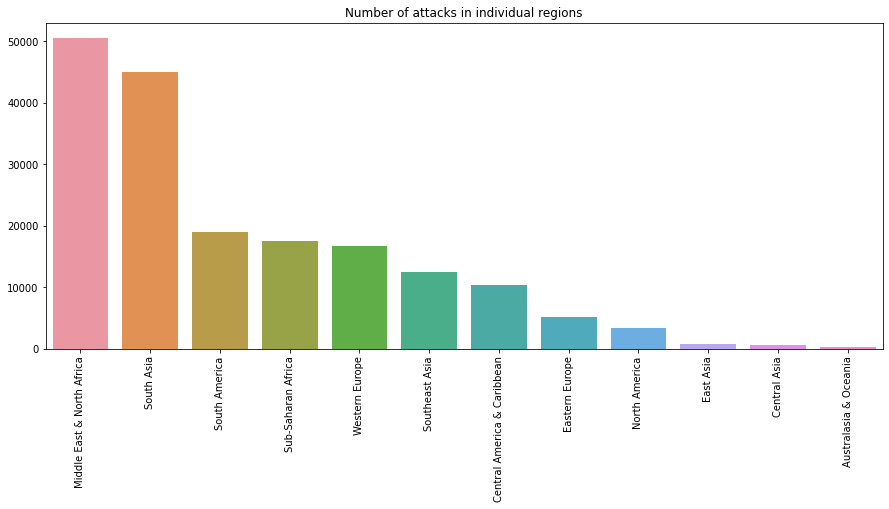

In [ ]:
#Number of attacks in regions
plt.subplots(figsize=(15,6))
sns.barplot(df['region'].value_counts().index, df['region'].value_counts().values,)

plt.xticks(rotation=90)
plt.title('Number of attacks in individual regions')
plt.show()

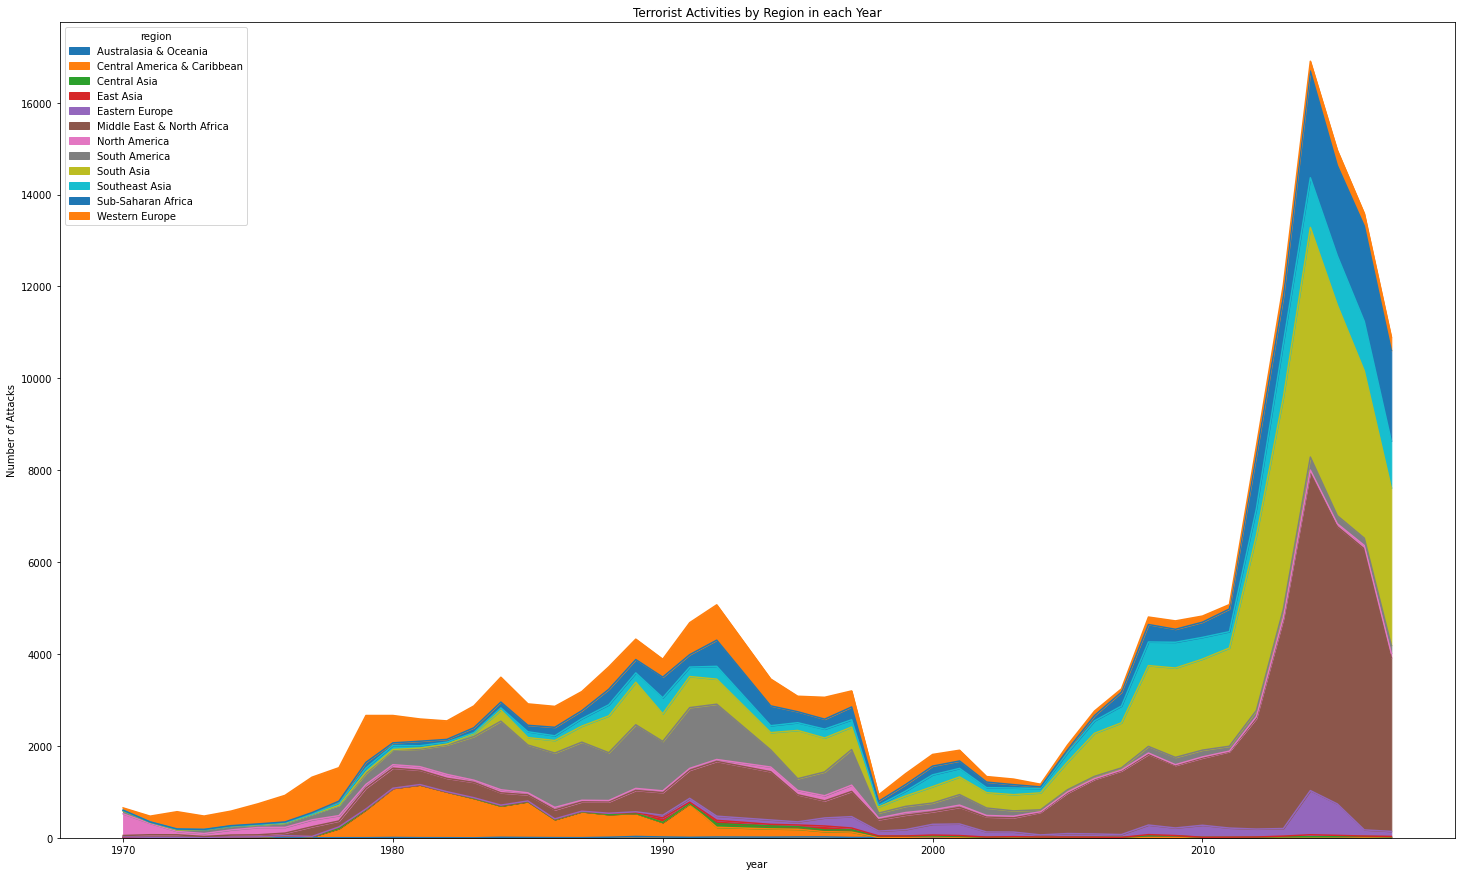

In [ ]:
#Terrorist activities by region in each year
pd.crosstab(df.year, df.region).plot(kind='area',figsize=(25,15))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [ ]:
print('Country with Highest Terrorist Attacks:', df['country'].value_counts().idxmax() )

print('Region with Highest Terrorist Attacks:', df['region'].value_counts().idxmax() )

print('Maximum people killed in an attack are:',df['kills'].max(),'that took place in', df.loc[df['kills'].idxmax(), 'country'])

print("Year with the most attacks:",df['year'].value_counts().idxmax())

print("Month with the most attacks:",df['month'].value_counts().idxmax())

print("Most Attack Types:",df['attack_type'].value_counts().idxmax())

print('Terrorist Group with Highest Terror Attacks:', df['group_name'].value_counts()[1:10].idxmax())

Country with Highest Terrorist Attacks: Iraq
Region with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Year with the most attacks: 2014
Month with the most attacks: 5
Most Attack Types: Bombing/Explosion
Terrorist Group with Highest Terror Attacks: Taliban


In [ ]:
# top 50 countries with terrorist attack
top50 = df['country'].value_counts().head(50)
print(top50)

Iraq                                24636
Pakistan                            14368
Afghanistan                         12731
India                               11960
Colombia                             8306
Philippines                          6908
Peru                                 6096
El Salvador                          5320
United Kingdom                       5235
Turkey                               4292
Somalia                              4142
Nigeria                              3907
Thailand                             3849
Yemen                                3347
Spain                                3249
Sri Lanka                            3022
United States                        2836
Algeria                              2743
France                               2693
Egypt                                2479
Lebanon                              2478
Chile                                2365
Libya                                2249
West Bank and Gaza Strip          

In [ ]:
#World Map
geo=pd.DataFrame({'country': df['country'].value_counts().index,
                   'Number_of_Attacks': df['country'].value_counts().values})

fig = px.choropleth(geo, locations="country", 
                    locationmode="country names", color="Number_of_Attacks", 
                    hover_name="country", range_color=[1, 5000], 
                    color_continuous_scale="reds", 
                    title='Number of Terrorist Attacks by Country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

Text(0.5, 1.0, 'Number Of Terrorist Activities in Region')

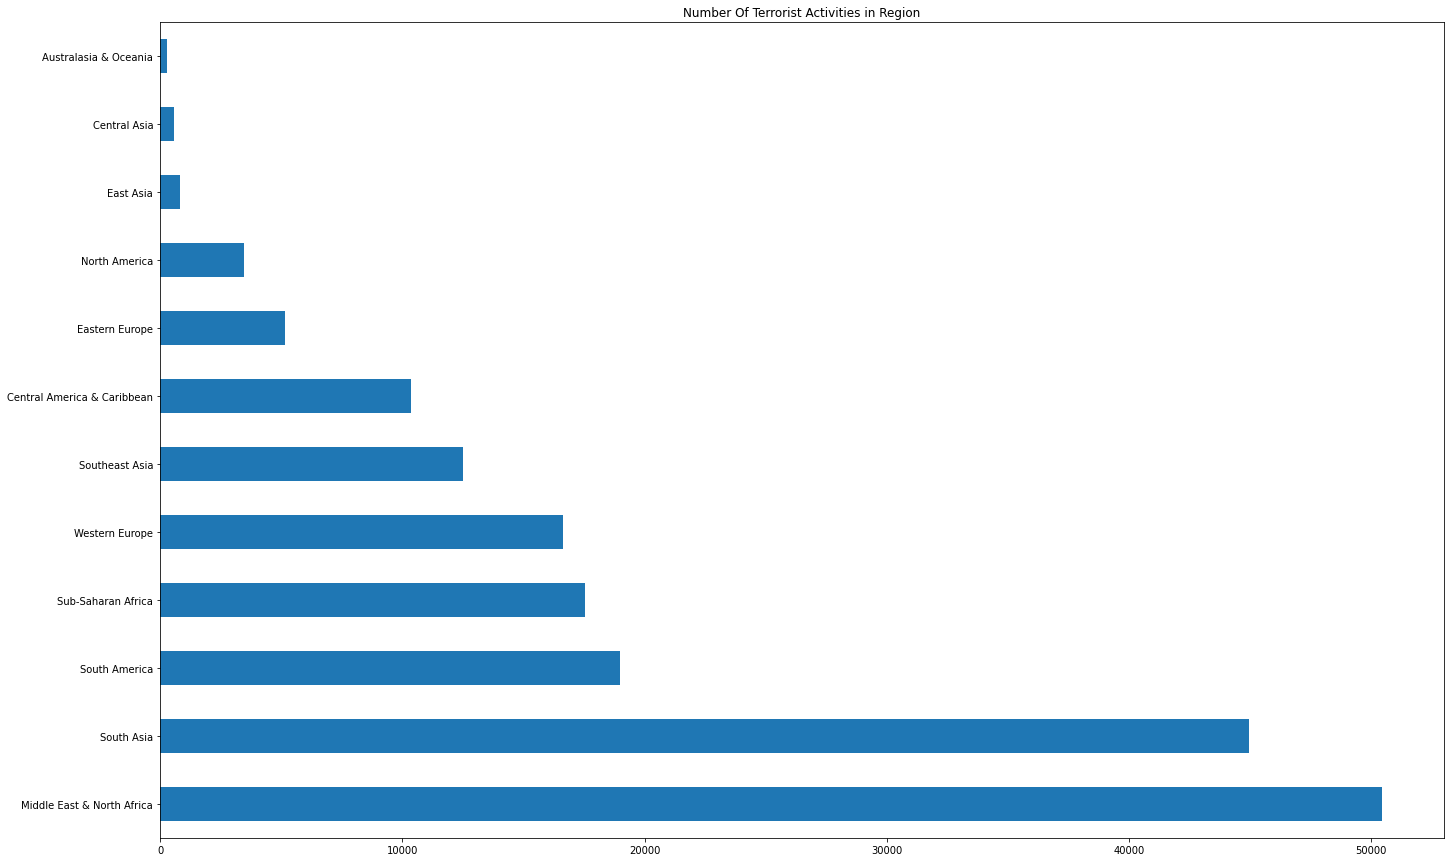

In [ ]:
df['region'].value_counts().plot(kind='barh',figsize=[23,15])
plt.title('Number Of Terrorist Activities in Region')

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 50 Countries')

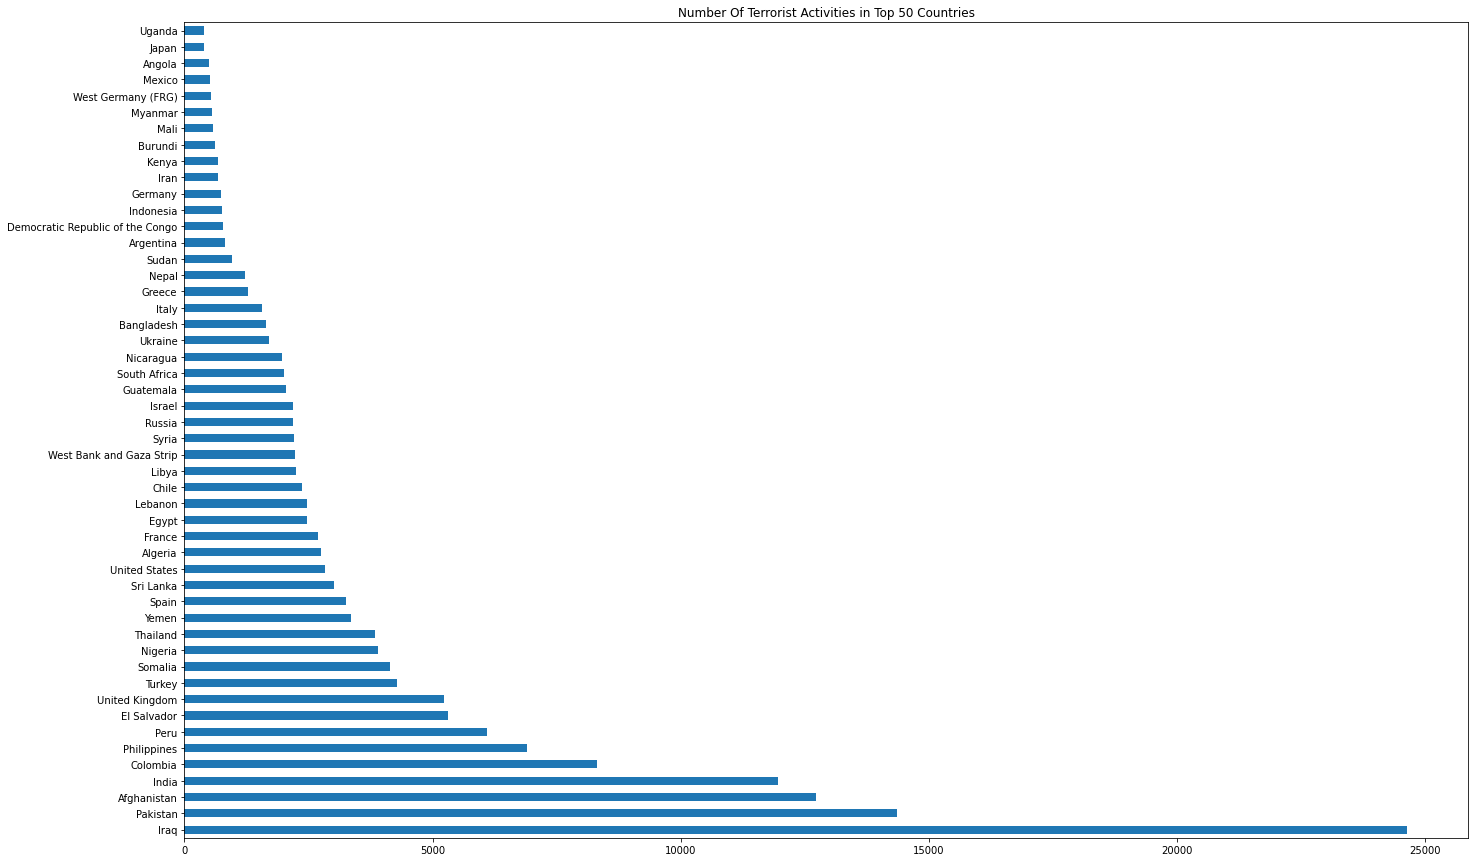

In [ ]:
df['country'].value_counts().head(50).plot(kind='barh',figsize=[23,15])
plt.title('Number Of Terrorist Activities in Top 50 Countries')

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 50 Cities')

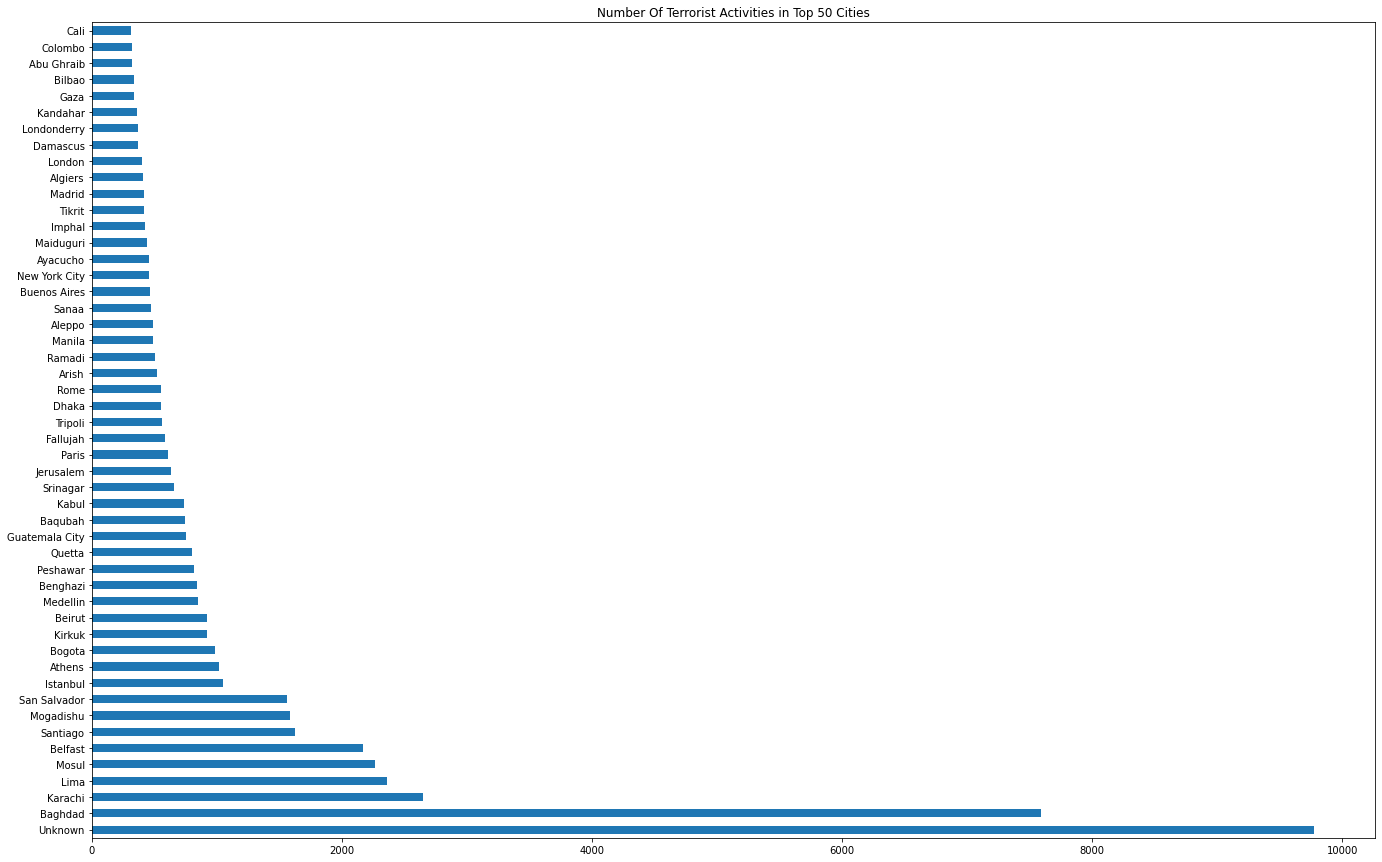

In [ ]:
#most attacked cities (top 50)
df['city'].value_counts().head(50).plot(kind='barh',figsize=[23,15])
plt.title('Number Of Terrorist Activities in Top 50 Cities')

In [ ]:
# average kills (on kills - terrorist loses included)
kills_average = df.kills.mean()
print('Average kills is: ' + str(kills_average))

#median kills (on nkill - terrorist loses included)
kills_median = df.kills.median()
print('Median kills is: ' + str(kills_median))

# variation (on nkill - terrorist loses included)
kills_variation = df.kills.var()
print('Variation kills is: ' + str(kills_variation))

# standard deviation (on nkill - terrorist loses included)
kills_deviation = df.kills.std()
print('Deviation kills is: ' + str(kills_deviation))

# skew (on nkill - terrorist loses included)
kills_skew = df.kills.mean()
print('Skew kills is: ' + str(kills_skew))

Average kills is: 2.4032722986614385
Median kills is: 0.0
Variation kills is: 133.30412508618372
Deviation kills is: 11.545740560318498
Skew kills is: 2.4032722986614385


In [ ]:
df.kills.describe()

count    171378.000000
mean          2.403272
std          11.545741
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: kills, dtype: float64

In [ ]:
df.wounded.describe()

count    165380.000000
mean          3.167668
std          35.949392
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: wounded, dtype: float64

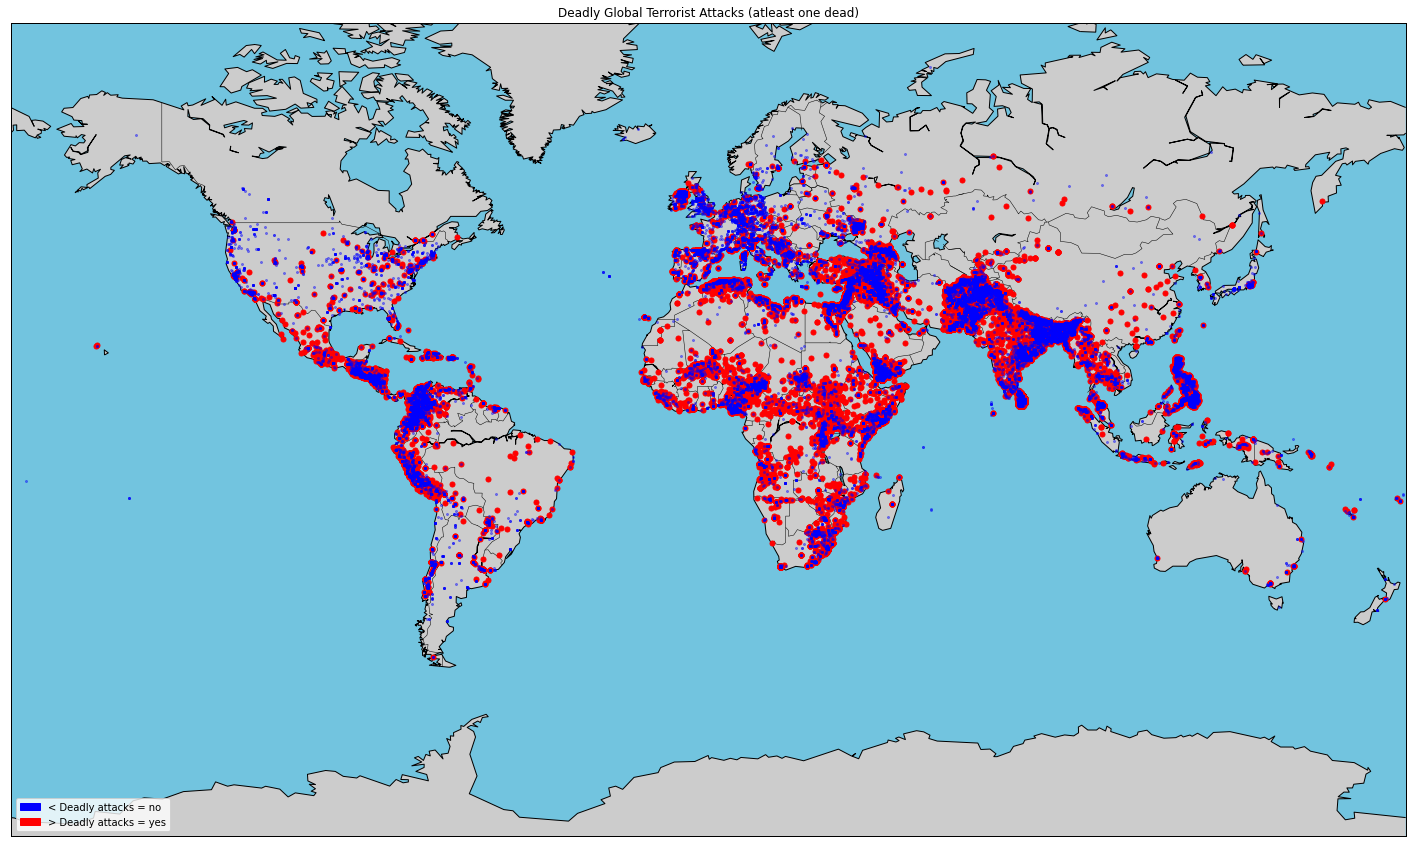

In [ ]:
#todo> dodělat popisy - smrtící útoky
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(df[df['kills']>=1].latitude)
long_100=list(df[df['kills']>=1].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(df[df['kills']<1].latitude)
long_=list(df[df['kills']<1].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='#72c4df')
m3.drawmapboundary(fill_color='#72c4df')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Deadly Global Terrorist Attacks (atleast one dead)')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< Deadly attacks = no"),
                    mpatches.Patch(color='red',label='> Deadly attacks = yes')])
plt.show()

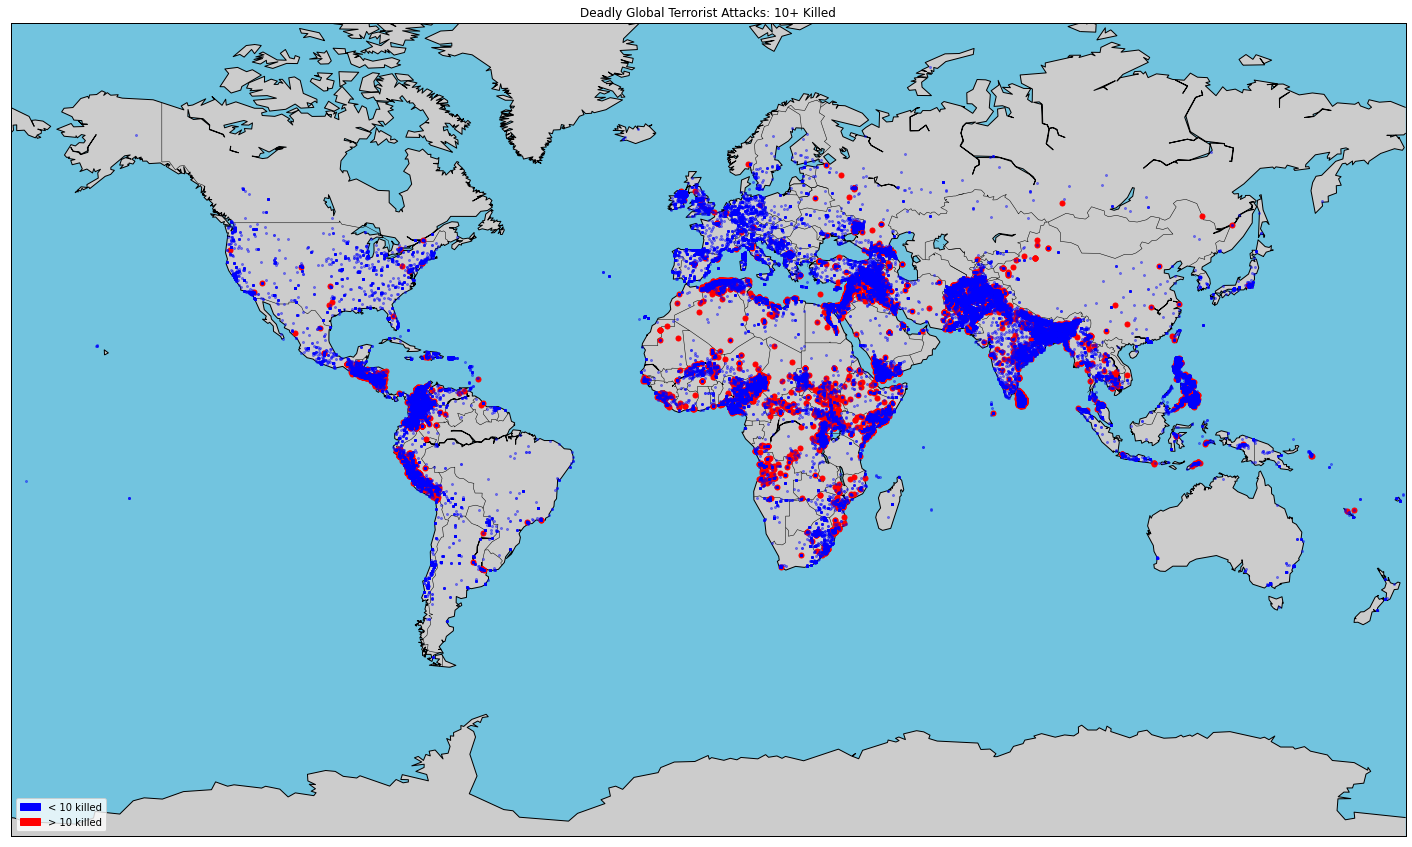

In [ ]:
#todo> dodělat popisy, upravit threshold - zabití
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(df[df['kills']>=10].latitude)
long_100=list(df[df['kills']>=10].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(df[df['kills']<10].latitude)
long_=list(df[df['kills']<10].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='#72c4df')
m3.drawmapboundary(fill_color='#72c4df')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Deadly Global Terrorist Attacks: 10+ Killed')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = '< 10 killed'),
                    mpatches.Patch(color='red',label='> 10 killed')])
plt.show()

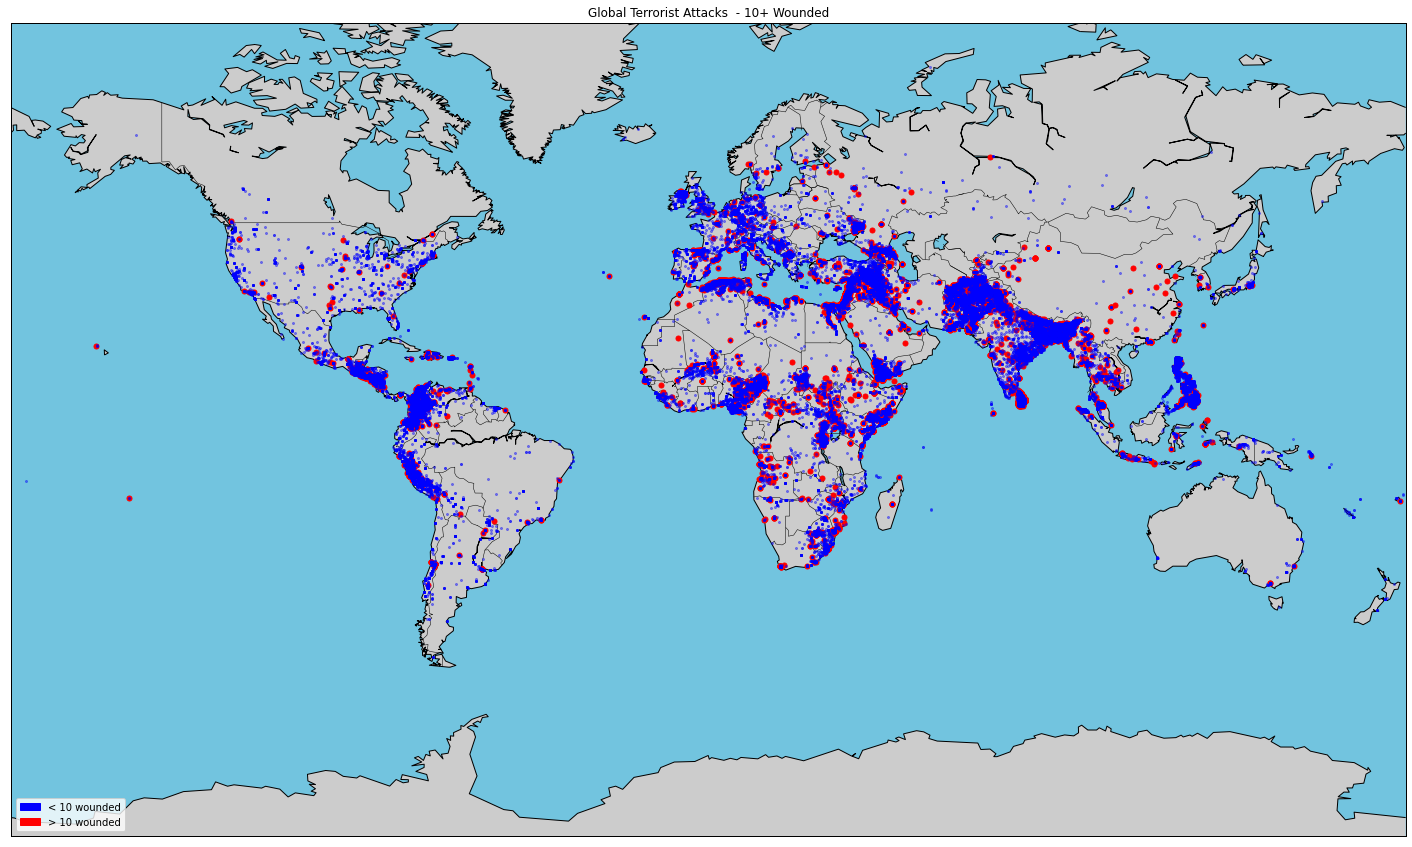

In [ ]:
#todo> dodělat popisy, upravit threshold - zranění
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(df[df['wounded']>=10].latitude)
long_100=list(df[df['wounded']>=10].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(df[df['wounded']<10].latitude)
long_=list(df[df['wounded']<10].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='#72c4df')
m3.drawmapboundary(fill_color='#72c4df')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Global Terrorist Attacks  - 10+ Wounded')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 10 wounded"),
                    mpatches.Patch(color='red',label='> 10 wounded')])
plt.show()

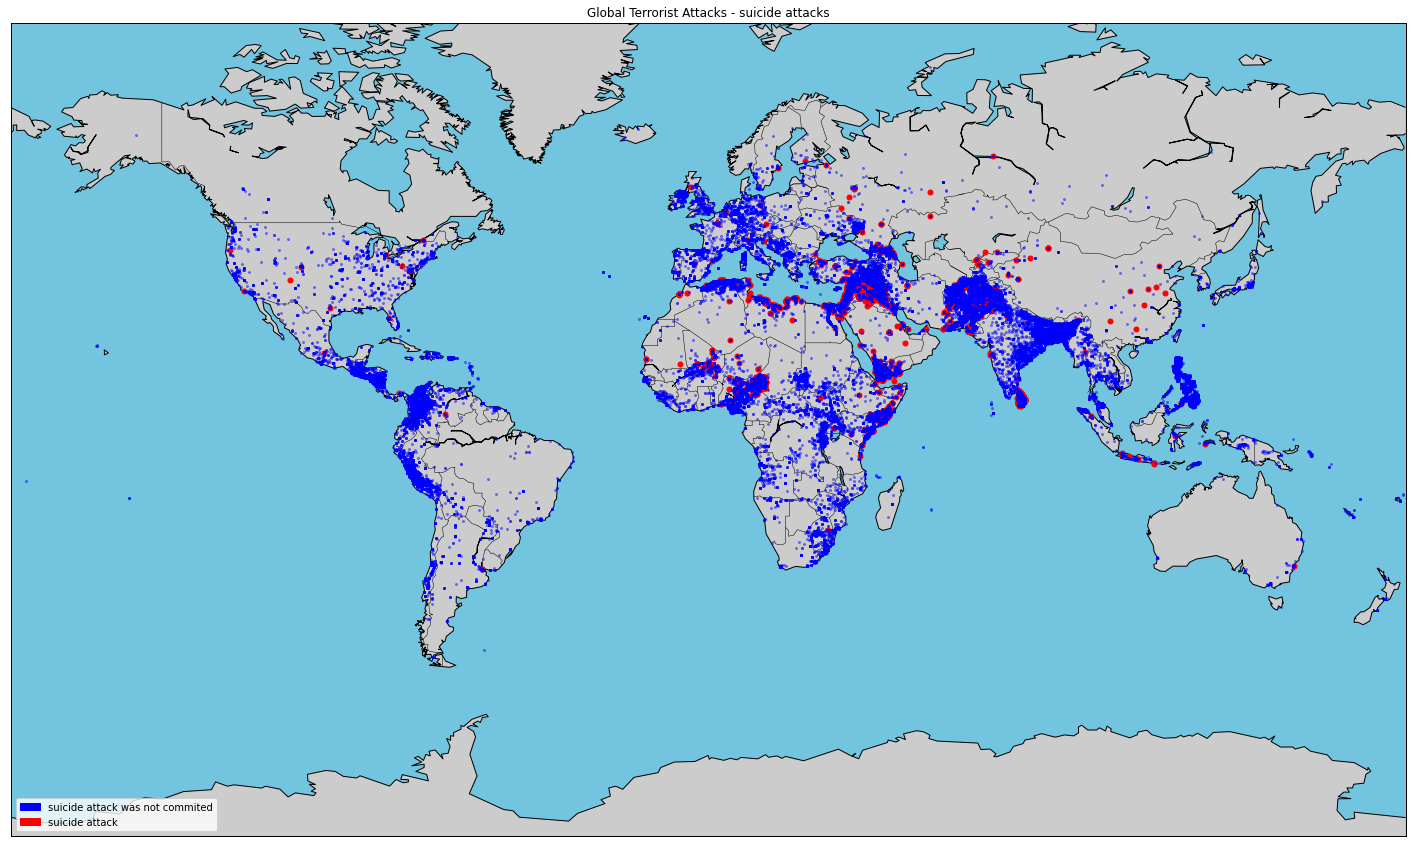

In [ ]:
#todo> dodělat popisy, upravit threshold - nad průmněr
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(df[df['suicide']>=1].latitude)
long_100=list(df[df['suicide']>=1].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(df[df['suicide']<1].latitude)
long_=list(df[df['suicide']<1].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='#72c4df')
m3.drawmapboundary(fill_color='#72c4df')
fig=plt.gcf()
fig.set_size_inches(25,20)
plt.title('Global Terrorist Attacks - suicide attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = 'suicide attack was not commited'),
                    mpatches.Patch(color='red',label='suicide attack')])
plt.show()

In [ ]:
eu_terror = df[df['country']=='Western europe']
print(eu_terror)

Empty DataFrame
Columns: [eventid, year, month, day, extended, country, region, city, vicinity, multiple, success, suicide, attack_type, target_type, Corporation, target, nationality, group_name, claimed, claimed_mode, weapon_type, kills, nkillter, wounded, wounded_ter, property, kidnaped, nkidnaped, nhours, ndays, kidcountry, ransom, ransompaid, kidoutcome, nrealeased, INT_LOG, INT_LOG, latitude, longitude, YearSum, MonthSum, DaySum]
Index: []

[0 rows x 42 columns]


In [ ]:
# tady bude animace vývoje útoků v EU v jednotlivých letech

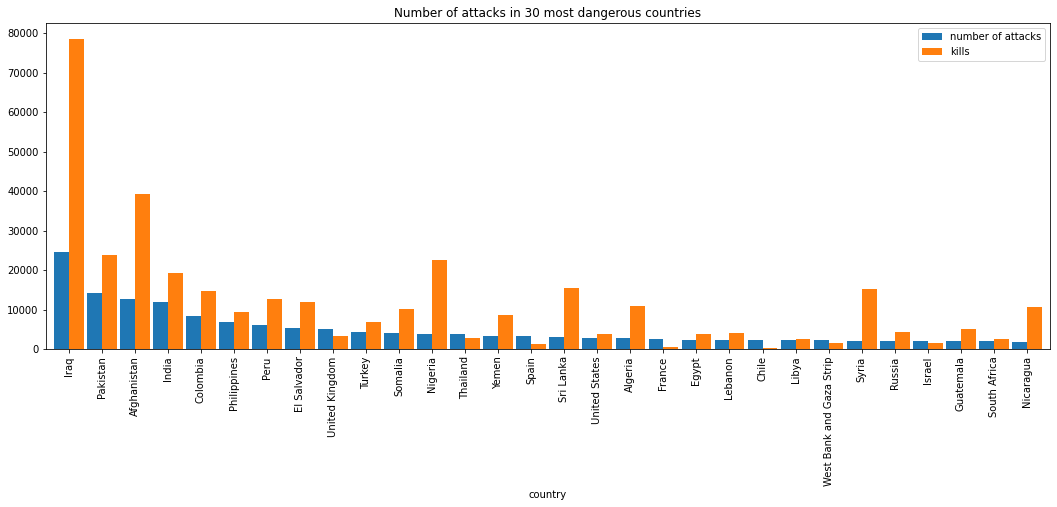

In [ ]:
#Attacks vs. kills in top 30
coun_terror=df['country'].value_counts()[:30].to_frame()
coun_terror.columns=['number of attacks']
coun_kill=df.groupby('country')['kills'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
plt.xlabel("country")
plt.title('Number of attacks in 30 most dangerous countries')
fig.set_size_inches(18,6)
plt.show()

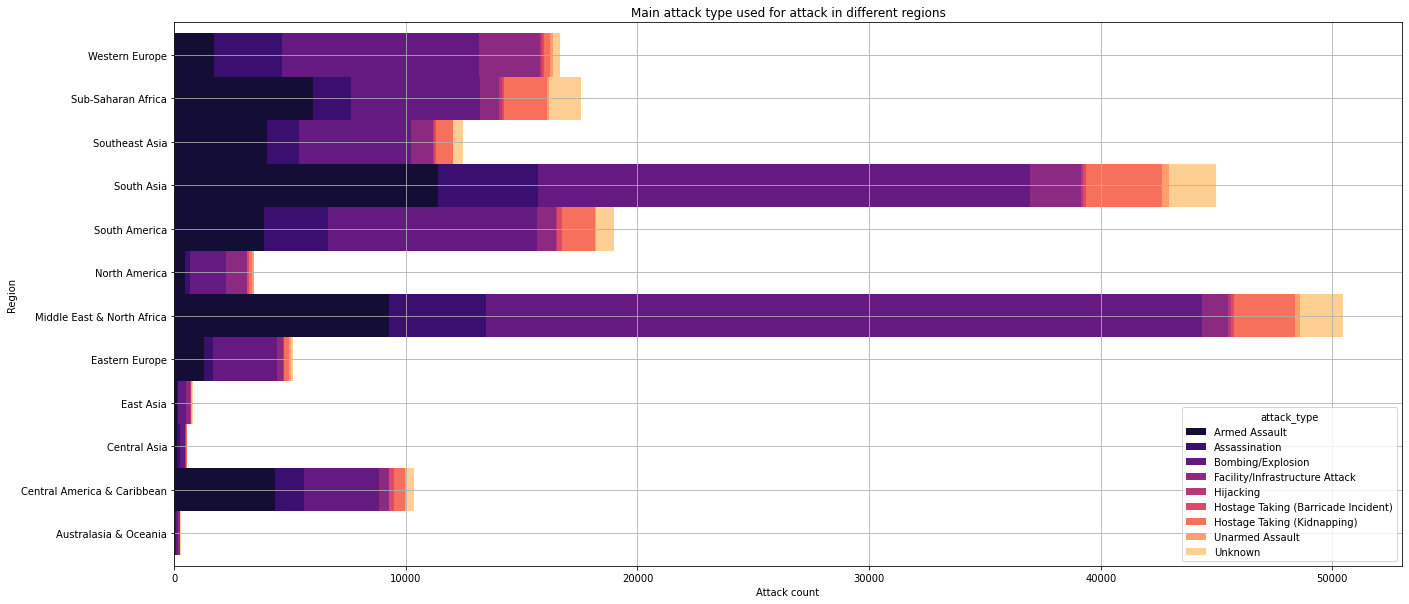

In [ ]:
pd.crosstab(df.region,df.attack_type).plot.barh(stacked=True,grid=True,width=1,color=sns.color_palette("magma",9))
fig=plt.gcf()
fig.set_size_inches(22,10)
plt.xlabel("Attack count")
plt.ylabel("Region")
plt.title("Main attack type used for attack in different regions")
plt.show()

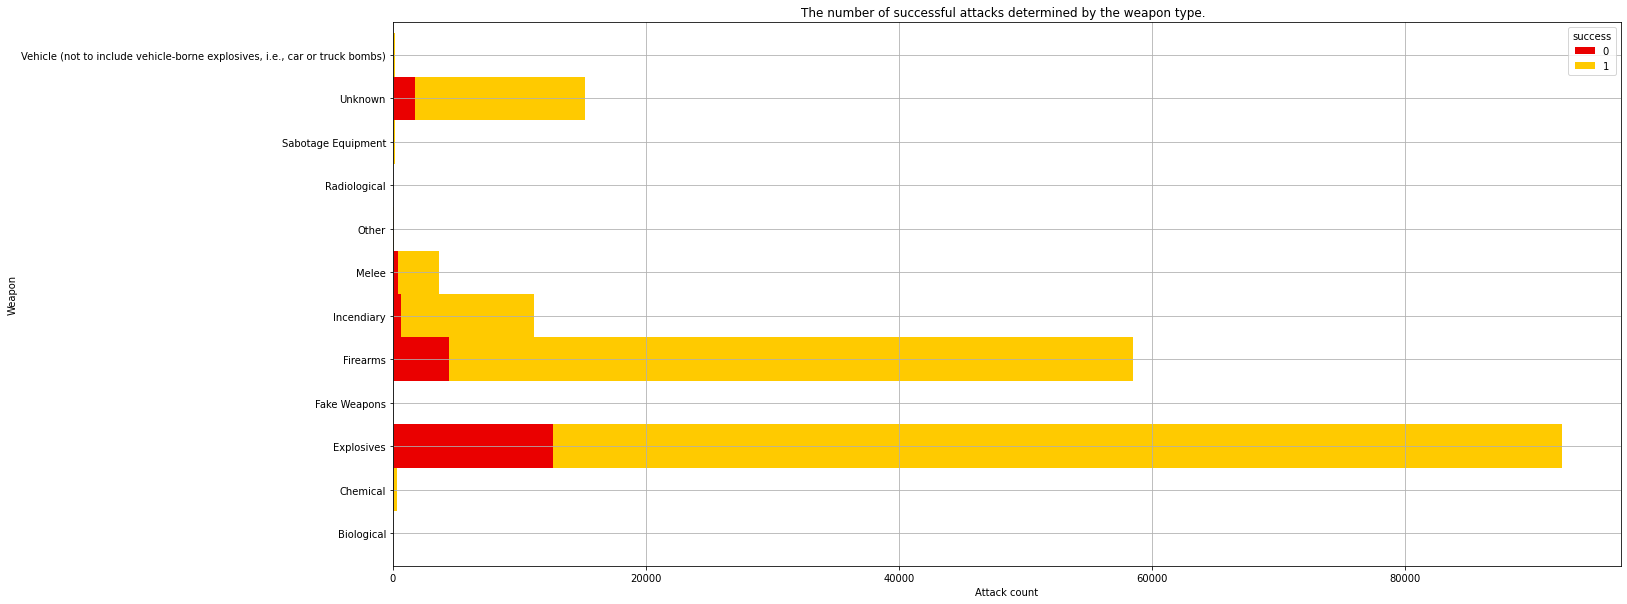

In [ ]:
#What weapons are most successfull
pd.crosstab(df.weapon_type, df.success).plot.barh(stacked=True,grid=True,width=1,color=sns.color_palette("hot",2))
fig=plt.gcf()
fig.set_size_inches(22,10)
plt.xlabel("Attack count")
plt.ylabel("Weapon")
plt.title("The number of successful attacks determined by the weapon type.  ")
plt.show()

In [ ]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

NameError: ignored

In [ ]:
#TO DO: Ověřit co se dělo v Iráku a proč není první 9/11
#TO DO: proč chybí rok 1993

# 4) Supervised machine learning

In [ ]:
!pip install lazypredict

### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
### importing breast Cancer Dataset from sklearn
from sklearn.datasets import load_breast_cancer
### spliting dataset into training and testing part
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### storing dataset in data variable
data = df

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.describe()

,eventid,year,month,day,extended,vicinity,multiple,success,suicide,claimed,...,ransom,ransompaid,nrealeased,INT_LOG,INT_LOG,latitude,longitude,YearSum,MonthSum,DaySum
count,181691.00,181691.00,181691.00,181691.00,181691.00,181691.00,181690.00,181691.00,181691.00,115571.00,...,77381.00,774.00,10400.00,181691.00,181691.00,177135.00,177134.00,181691.00,181691.00,181691.00
mean,200270523949.25,2002.64,6.47,15.51,0.05,0.07,0.14,0.89,0.04,0.05,...,-0.15,717943.70,-29.02,-4.54,-4.46,23.50,-458.70,7593.07,15194.11,5860.35
std,1325957057.16,13.26,3.39,8.81,0.21,0.28,0.34,0.31,0.19,1.09,...,1.21,10143919.93,65.72,4.54,4.64,18.57,204778.99,5348.98,936.07,558.04
min,197000000001.00,1970.00,0.00,0.00,0.00,-9.00,0.00,0.00,0.00,-9.00,...,-9.00,-99.00,-99.00,-9.00,-9.00,-53.15,-86185896.00,471.00,20.00,891.00
25%,199102060003.50,1991.00,4.00,8.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,-99.00,-99.00,-9.00,-9.00,11.51,4.55,3081.00,14906.00,5827.00
50%,200902230001.00,2009.00,6.00,15.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,-9.00,-9.00,31.47,43.25,4826.00,15257.00,5937.00
75%,201408090035.50,2014.00,9.00,23.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,1273.41,1.00,0.00,0.00,34.69,68.71,13587.00,15800.00,6028.00
max,201712310032.00,2017.00,12.00,31.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,275000000.00,2769.00,1.00,1.00,74.63,179.37,16903.00,16875.00,6500.00


In [ ]:
data.shape

(181691, 42)

In [ ]:
df.isna().sum()

eventid              0
year                 0
month                0
day                  0
extended             0
country              0
region               0
city               434
vicinity             0
multiple             1
success              0
suicide              0
attack_type          0
target_type          0
Corporation      42550
target             636
nationality       1559
group_name           0
claimed          66120
claimed_mode    162608
weapon_type          0
kills            10313
nkillter         66958
wounded          16311
wounded_ter      69143
property             0
kidnaped           178
nkidnaped       168119
nhours          177628
ndays           173567
kidcountry      178386
ransom          104310
ransompaid      180917
kidoutcome      170700
nrealeased      171291
INT_LOG              0
INT_LOG              0
latitude          4556
longitude         4557
YearSum              0
MonthSum             0
DaySum               0
dtype: int64

In [ ]:
#pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

NameError: ignored

In [ ]:
#df.drop(['city'], inplace=True, axis=1)

In [ ]:
#data.isna().sum()

In [ ]:
### separating dataset into dependent and independent features
X = data.data
y = data.target

In [ ]:
### splitting dataset into training and testing part(50% training and 50% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [ ]:
### fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)